In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("uber.csv")

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df = df.drop(columns=['key','Unnamed: 0'])

In [ ]:
df.shape

(8918, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8918 entries, 0 to 8917
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        8917 non-null   float64
 1   pickup_datetime    8917 non-null   object 
 2   pickup_longitude   8917 non-null   float64
 3   pickup_latitude    8917 non-null   float64
 4   dropoff_longitude  8917 non-null   float64
 5   dropoff_latitude   8917 non-null   float64
 6   passenger_count    8917 non-null   float64
dtypes: float64(6), object(1)
memory usage: 487.8+ KB


In [ ]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8918 entries, 0 to 8917
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        8917 non-null   float64            
 1   pickup_datetime    8917 non-null   datetime64[ns, UTC]
 2   pickup_longitude   8917 non-null   float64            
 3   pickup_latitude    8917 non-null   float64            
 4   dropoff_longitude  8917 non-null   float64            
 5   dropoff_latitude   8917 non-null   float64            
 6   passenger_count    8917 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 487.8 KB


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,8917.00000,8917.000000,8917.000000,8917.000000,8917.000000,8917.000000
mean,11.44521,-72.700539,40.000828,-72.673399,40.005821,1.665358
std,10.41732,12.320446,5.895643,9.855862,5.880433,1.286880
min,2.50000,-748.016667,-74.009697,-75.350437,-73.994370,0.000000
25%,6.00000,-73.992015,40.734997,-73.991472,40.733642,1.000000
50%,8.50000,-73.981582,40.752407,-73.979908,40.752997,1.000000
75%,12.50000,-73.967155,40.767058,-73.963588,40.768180,2.000000
max,350.00000,40.770667,41.366138,40.761672,41.366138,6.000000


In [ ]:
df.isnull().sum()

,0
fare_amount,1
pickup_datetime,1
pickup_longitude,1
pickup_latitude,1
dropoff_longitude,1
dropoff_latitude,1
passenger_count,1


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7b44e38d1f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7b44e38d2540>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b44eb34a630>],
 'medians': [<matplotlib.lines.Line2D at 0x7b44e38d2a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b44e38d2d80>],
 'means': []}

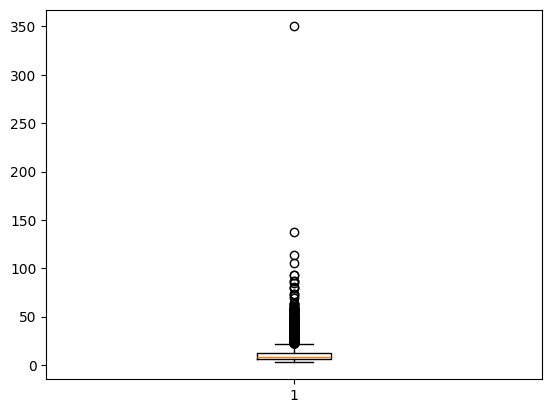

In [ ]:
plt.boxplot(df['fare_amount'])

In [ ]:
low = df['fare_amount'].quantile(0.01)
high = df['fare_amount'].quantile(0.99)

df = df[(df['fare_amount']<high) & (df['fare_amount']>low)]

In [ ]:
df.select_dtypes(include=[np.number]).corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,-0.000720,0.007332,-0.004546,0.005854,-0.014414
pickup_longitude,-0.000720,1.000000,-0.774877,0.767338,-0.751213,0.011571
pickup_latitude,0.007332,-0.774877,1.000000,-0.945120,0.968194,-0.013817
dropoff_longitude,-0.004546,0.767338,-0.945120,1.000000,-0.978182,0.013124
dropoff_latitude,0.005854,-0.751213,0.968194,-0.978182,1.000000,-0.014259
passenger_count,-0.014414,0.011571,-0.013817,0.013124,-0.014259,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x = df.drop(['fare_amount'], axis =1 )
y= df['fare_amount']

In [ ]:
x['pickup_datetime']= pd.to_datetime(x['pickup_datetime']).astype('int64')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
liner_model = LinearRegression()
liner_model.fit(x_train,y_train)

prediction = liner_model.predict(x_test)

r2score = r2_score(y_test, prediction)
rsmeScore = np.sqrt(mean_squared_error(y_test, prediction))
print("Linear regression RSME: ",rsmeScore," R2 ",r2score)

Linear regression RSME:  8.360652289012641  R2  0.014237072185480981


In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("RF R²:", r2_score(y_test, rf_pred))

RF RMSE: 3.9349430184968384
RF R²: 0.7816420275715725


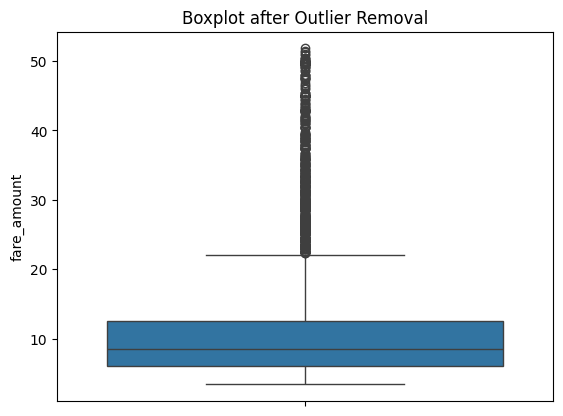

In [ ]:
sns.boxplot(y=df['fare_amount'])
plt.title("Boxplot after Outlier Removal")
plt.show()